# <h1 align="center">COVID-19: Exploratory Data Analysis</h1>                                           
<img src="covidimage.gif" width="500" align="center">

Visualization analysis of  italy COVID-19 datasets,provided by John Hopkins University,to gain insights about the virus by analysing the data through visualizations.Also I created a **Tablue dashboard** and a **Flourish racing bar dashboard** all of which are integrated into Jupyter.


Dataset source: <a href = 'https://www.kaggle.com/virosky/italy-covid19'>Here</a>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, ImageColorGenerator



import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

### Gaining insights about the details of the individuals with the virus


**First Dataset**

The dataset contains age distribution of Covid-19 cases across all pronvinces in Italy.We will explore the dataset doing some data cleaning and manipulation and provide answers visualition of the following questions.

* Age distribution of all total cases
* Age distribution of total Deaths
* Compare Age distribution of confirmed cases by Gender

In [27]:
#import Datasets
covid_age = pd.read_csv('Data/covid-age.csv',index_col = 'age_classes')
covid_age

,Unnamed: 0,male_cases,male_deaths,female_cases,female_deaths,total_cases,total_deaths,piemonte_cases,lombardia_cases,veneto_cases,...,toscana_cases,umbria_cases,marche_cases,lazio_cases,abruzzo_cases,molise_cases,campania_cases,puglia_cases,sicilia_cases,sardegna_cases
age_classes,,,,,,,,,,,,,,,,,,,,,
0-9,0,381,0,307,0,693,0,35,205,90,...,56,22,20,35,16,1,17,21,12,7
10-19,1,475,0,454,0,931,0,29,170,164,...,66,20,29,48,41,7,30,34,23,8
20-29,2,1919,4,2531,2,4530,6,311,1494,715,...,167,65,127,152,62,6,102,117,59,23
30-39,3,3505,22,3885,7,7466,29,479,2778,879,...,264,96,265,283,124,12,138,195,85,70
40-49,4,6480,81,7130,29,13701,110,1021,5436,1460,...,523,111,472,436,238,22,203,298,147,115
50-59,5,11149,377,9706,100,20975,479,1634,8866,2182,...,825,191,725,654,267,47,303,445,241,126
60-69,6,11761,1144,6254,299,18089,1448,1436,8266,1483,...,701,139,630,507,300,28,268,353,190,93
70-79,7,12281,3146,6868,1041,19238,4196,1551,9651,1303,...,661,96,642,450,204,13,176,271,133,79
80-89,8,8553,3259,7644,1767,16252,5029,1345,7631,1371,...,525,54,659,396,151,16,101,260,79,76


In [28]:
#Drop two first columns
covid_age.drop(covid_age.iloc[:,0:1],axis = 1,inplace = True)

In [30]:
#Age distribution of total cases
cases = covid_age.groupby(['age_classes'])[('total_cases','male_cases','female_cases')].agg(sum).reset_index()
cases.head()

,age_classes,total_cases,male_cases,female_cases
0,0-9,693,381,307
1,10-19,931,475,454
2,20-29,4530,1919,2531
3,30-39,7466,3505,3885
4,40-49,13701,6480,7130


In [31]:
#Age distribution of total Deaths

deaths= covid_age.groupby(['age_classes'])[('total_deaths','male_deaths','female_deaths')].agg(sum).reset_index()
deaths.head()

,age_classes,total_deaths,male_deaths,female_deaths
0,0-9,0,0,0
1,10-19,0,0,0
2,20-29,6,4,2
3,30-39,29,22,7
4,40-49,110,81,29


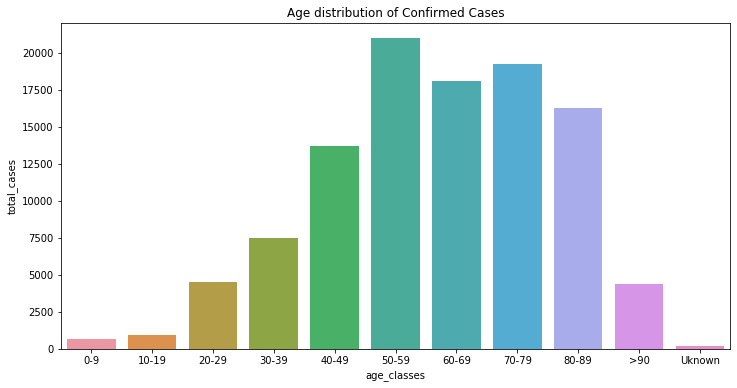

In [32]:
# visuaöize age distribution of confirmed cases
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Age distribution of Confirmed Cases")
sns.barplot(ax = ax,
            data = cases,
            x = 'age_classes',
            y = 'total_cases')
plt.show()

The plot aboves clearly shows that irrespective of gender,most confirmed COVID-19 cases occur among people advanced in age.

<Figure size 432x288 with 0 Axes>

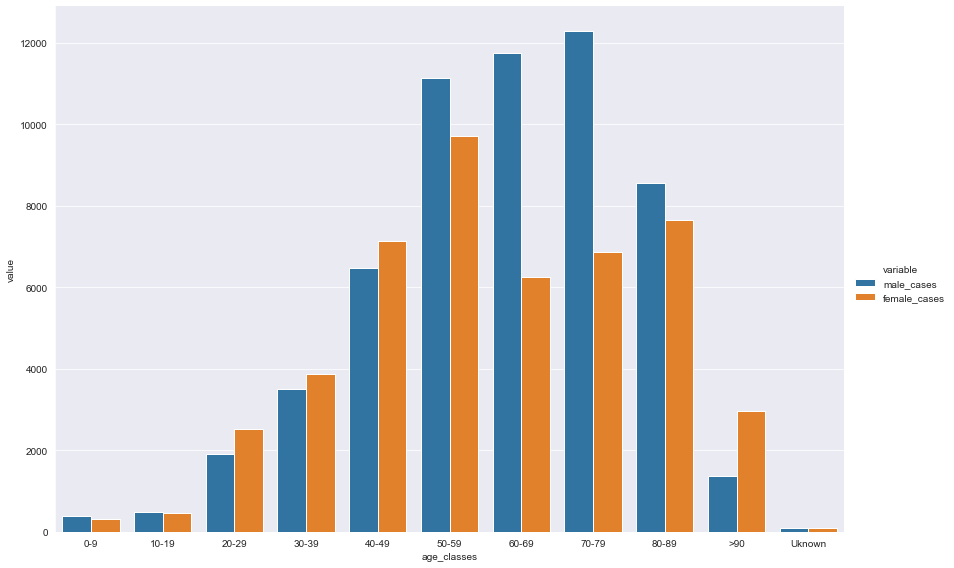

In [181]:
#Manipulate data to obtain a ngender based plot 
df_melt = pd.melt(cases, value_vars = ("male_cases","female_cases"),id_vars = "age_classes")

fig = plt.figure()
sns.factorplot(x = 'age_classes', y='value', hue = 'variable',data=df_melt, kind='bar',height=8, aspect=1.5 )

plt.show()

Based on gender males tend to dominate in the number of confirmed cases. .However beyond 90 years women has higher confirmed cases

In [35]:
#Piecharts comparing Confirmed and Death cases

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                   x_title='% of confirmed and death cases based on gender')


fig.add_trace(go.Pie(
     values=cases['male_cases'],
     labels=cases['age_classes'],
     domain=dict(x=[0,0.5]),
     name='Male: Confirmed cases'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=cases['female_cases'],
     labels=cases['age_classes'],
     domain=dict(x=[0.5,1.0]),
     name='Female: Confirmed cases'), 
    row=1, col=2)

fig.show()

**Second Dataset**

Pre-existing chronic patologies observed in patients deceased by COVID19 . Last 4 rows are records of patients deceased and detection on how comorbidities they have. 

In [319]:
#import Datasets
covid_disease = pd.read_csv('Data/covid-disease.csv')
covid_disease

,Unnamed: 0,Disease,Men,Women,Total
0,0,Ischemic heart disease,64,238,302
1,1,Atrial Fibrillation,84,165,249
2,2,Heart Failure,78,108,186
3,3,Stroke,37,90,127
4,4,Hypertension,251,543,794
5,5,Type 2-Diabetes,102,245,347
6,6,Dementia,66,107,173
7,7,COPD,44,158,202
8,8,Active cancer in the past 5 years,54,134,188
9,9,Chronic liver disease,10,35,45


In [208]:
#Drop row
covid_disease.drop(covid_disease.iloc[11:15,:].index,axis = 0,inplace = True)


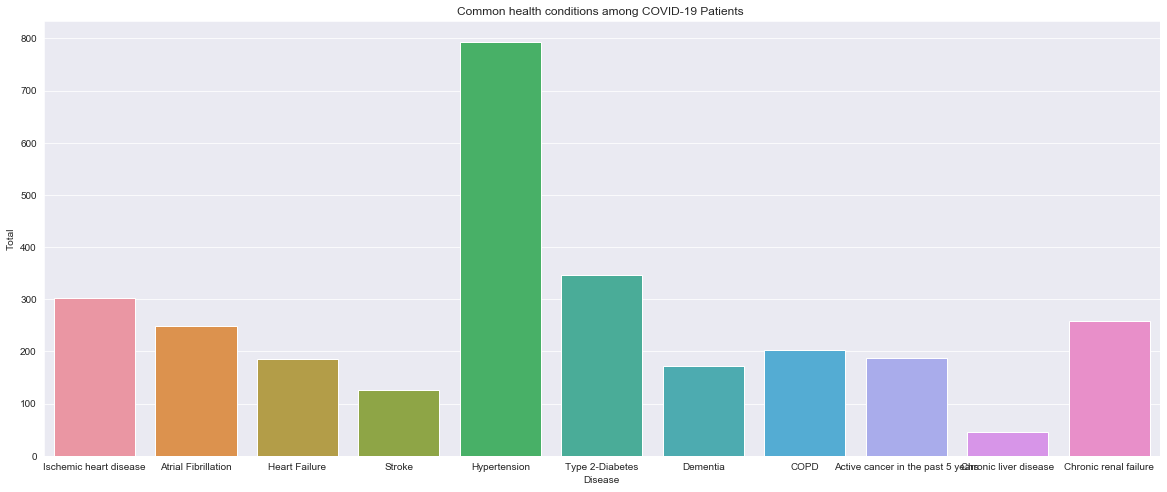

In [214]:
# Common underlying health condition amongst COVID-19 cases
fig, ax = plt.subplots(figsize=(20,8))
plt.title("Common health conditions among COVID-19 Patients ")
sns.barplot(ax = ax,
            data = covid_disease,
            x = 'Disease',
            y = 'Total')
plt.show()

Majority of those with the virus are patients with Hypertension

In [320]:
#Convert two columns of dataframe to dict
d_ = {Diseases: Frequency for Diseases, Frequency  in zip(covid_disease['Disease'].values, covid_disease['Total'].values)}

<Figure size 720x720 with 0 Axes>

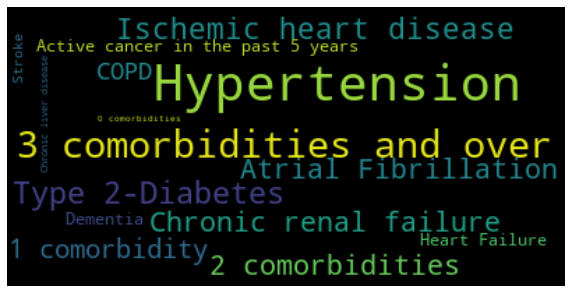

In [326]:
'''A word cloud of common underlying health conditions based on the frequencies of total column'''

#dataframe with disease and total column
word = covid_disease.drop(columns=['Men','Women','Unnamed: 0'],axis = 1)
for a, x in word.values:
    d[a] = x

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

### Third dataset

Timeline of total cases for every province with Latitude and longitude. We perform some data cleaning and manipulation to create a timeline visualization published on Flourish, and some interesting Tableau dashboard.

In [140]:
#Import Dataset
df = pd.read_csv('Data/covid19-ita-regions.csv',index_col = 'date')
df_copy = df.copy()
df.head()

,Unnamed: 0,state,region_code,region,lat,long,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made,casi_testati,note_it,note_en
date,,,,,,,,,,,,,,,,,,,,
2020-02-24T18:00:00,0,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN
2020-02-24T18:00:00,1,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-02-24T18:00:00,2,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
2020-02-24T18:00:00,3,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
2020-02-24T18:00:00,4,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,NaN


In [85]:
df.describe()

,Unnamed: 0,region_code,lat,long,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made,casi_testati
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,315.000000
mean,734.500000,10.190476,43.046293,12.225955,827.292517,105.958503,933.251020,1970.851701,2904.102721,67.998639,143.339456,1124.926531,575.961224,4604.990476,32729.538776,56916.666667
std,424.496761,5.797036,2.489628,2.659853,1907.428144,206.199386,2108.557619,3911.031974,5772.433128,201.094009,295.534229,3283.628042,1827.564207,10655.846297,59273.699507,56520.263853
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-2299.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,3482.000000
25%,367.250000,5.000000,41.125596,11.121231,31.000000,6.000000,39.000000,72.250000,132.250000,0.000000,7.000000,2.000000,3.000000,150.250000,1229.750000,19803.500000
50%,734.500000,10.000000,43.616760,12.388247,164.000000,31.000000,194.500000,590.500000,820.000000,16.000000,44.000000,86.000000,68.500000,1128.000000,9535.500000,32961.000000
75%,1101.750000,15.000000,45.434905,13.768136,671.000000,112.000000,787.500000,1842.500000,2856.750000,78.000000,129.000000,711.750000,306.250000,3746.500000,35694.000000,85297.000000
max,1469.000000,20.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,29785.000000,36926.000000,1950.000000,3251.000000,26371.000000,14231.000000,77528.000000,410857.000000,247176.000000


In [78]:
#Obtain the number of (rows,columns)
df.shape

(1470, 21)

In [82]:
#% of null values for each column
df.isnull().sum()/df.shape[1]

In [89]:
#fill Nanw with 0
df.fillna(0).head()

,Unnamed: 0,date,state,region_code,region,lat,long,hospitalized_with_symptoms,intensive_care,total_hospitalized,...,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made,casi_testati,note_it,note_en
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,...,0,0,0,0,0,0,5,0.0,0,0
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,...,0,0,0,0,0,0,1,0.0,0,0
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,...,0,0,0,0,0,0,1,0.0,0,0
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,...,0,0,0,0,0,0,10,0.0,0,0


In [119]:
#convert time to Datatime object
pd.to_datetime(df.index)

DatetimeIndex(['2020-02-24 18:00:00', '2020-02-24 18:00:00',
               '2020-02-24 18:00:00', '2020-02-24 18:00:00',
               '2020-02-24 18:00:00', '2020-02-24 18:00:00',
               '2020-02-24 18:00:00', '2020-02-24 18:00:00',
               '2020-02-24 18:00:00', '2020-02-24 18:00:00',
               ...
               '2020-05-03 17:00:00', '2020-05-03 17:00:00',
               '2020-05-03 17:00:00', '2020-05-03 17:00:00',
               '2020-05-03 17:00:00', '2020-05-03 17:00:00',
               '2020-05-03 17:00:00', '2020-05-03 17:00:00',
               '2020-05-03 17:00:00', '2020-05-03 17:00:00'],
              dtype='datetime64[ns]', name='date', length=1470, freq=None)

In [99]:
#Region with the most deaths
deaths_per_region = pd.DataFrame(df.groupby(['region'])['deaths'].agg(sum))


In [109]:
#Group regions in terms of number of test performed
test_per_region = pd.DataFrame(df.groupby(['region'])['swabs_made'].agg(sum))
test_per_region.head()

,swabs_made
region,
Abruzzo,908956
Basilicata,238246
Calabria,839401
Campania,1677007
Emilia-Romagna,4602180


In [135]:
#GSummary of covid related info from the dataset
df_covid = df_copy.drop(columns = ['region_code','Unnamed: 0','lat','long','casi_testati','note_it','note_en'],axis = 1)
df_covid_summary=  pd.DataFrame(df_covid.groupby('region').sum())
df_covid_summary.head()

,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made
region,,,,,,,,,,,
Abruzzo,14690,2400,17090,53146,70236,1868,2996,11380,8687,90303,908956
Basilicata,2075,531,2606,7088,9694,194,386,2206,680,12580,238246
Calabria,6227,624,6851,23930,30781,702,1114,4383,2506,37670,839401
Campania,23777,3957,27734,83600,111334,2726,4484,22349,10214,143897,1677007
Emilia-Romagna,157771,15597,173368,373840,547208,9027,26016,208854,109772,865834,4602180


The Data is manipulated and transposed to a form suitable to be used to create a racing bar chart with Flourish

In [168]:
#create new dataframe with selected columns
df_Modify = pd.DataFrame(df_copy,columns = ['date','region','total_confirmed_cases'])

In [169]:
#Transpose Data
df_T= pd.DataFrame(df_Modify.groupby(['region','date'],as_index = False).sum().pivot('region','date').fillna(0))
df_T

total_confirmed_cases                      \
date                    2020-02-24T18:00:00 2020-02-25T18:00:00   
region                                                            
Abruzzo                                   0                   0   
Basilicata                                0                   0   
Calabria                                  0                   0   
Campania                                  0                   0   
Emilia-Romagna                           18                  26   
Friuli Venezia Giulia                     0                   0   
Lazio                                     2                   2   
Liguria                                   0                   1   
Lombardia                               166                 231   
Marche                                    0                   0   
Molise                                    0                   0   
P.A. Bolzano                              0                   1   
P.A. Trento                               0                   0   
Piemonte                                  3                   3   
Puglia                                    0                   0   
Sardegna                                  0                   0   
Sicilia                                   0                   3   
Toscana                                   0                   2   
Umbria                                    0                   0   
Valle d'Aosta                             0                   0   
Veneto                                   32                  42   

                                                               \
date                  2020-02-26T18:00:00 2020-02-27T18:00:00   
region                                                          
Abruzzo                                 0                   1   
Basilicata                              0                   0   
Calabria                                0                   0   
Campania                                0                   3   
Emilia-Romagna                         46                  96   
Friuli Venezia Giulia                   0                   0   
Lazio                                   0                   0   
Liguria                                11                  19   
Lombardia                             249                 349   
Marche                                  1                   3   
Molise                                  0                   0   
P.A. Bolzano                            1                   1   
P.A. Trento                             0                   0   
Piemonte                                3                   2   
Puglia                                  0                   1   
Sardegna                                0                   0   
Sicilia                                 3                   2   
Toscana                                 2                   2   
Umbria                                  0                   0   
Valle d'Aosta                           0                   0   
Veneto                                 69                 109   

                                                               \
date                  2020-02-28T18:00:00 2020-02-29T17:00:00   
region                                                          
Abruzzo                                 1                   2   
Basilicata                              0                   0   
Calabria                                1                   1   
Campania                                4                  13   
Emilia-Romagna                        143                 213   
Friuli Venezia Giulia                   0                   0   
Lazio                                   0                   3   
Liguria                                19                  38   
Lombardia                             474                 552   
Marche                                  6                  11   
Molise 

### Tableau Dashboard

 An Intereactive Tableau Dashboard for visualizing the  data

In [148]:
%%HTML 
<script type='text/javascript' src='https://dub01.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1000px; height: 827px;'><object class='tableauViz' width='1000' height='827' style='display:none;'><param name='host_url' value='https%3A%2F%2Fdub01.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;idatavisualizations' /><param name='name' value='covid-19_italydashboard&#47;Covid-19_Italy' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

## Racing bar charts 

I made a racing bar chart with Flourish for visualizing cumulative data across Regions.

In [172]:
%%HTML
<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/3099006" data-url="https://flo.uri.sh/visualisation/3099006/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>